<AxesSubplot:title={'center':"Dean's Music League Votes"}, xlabel='Person'>

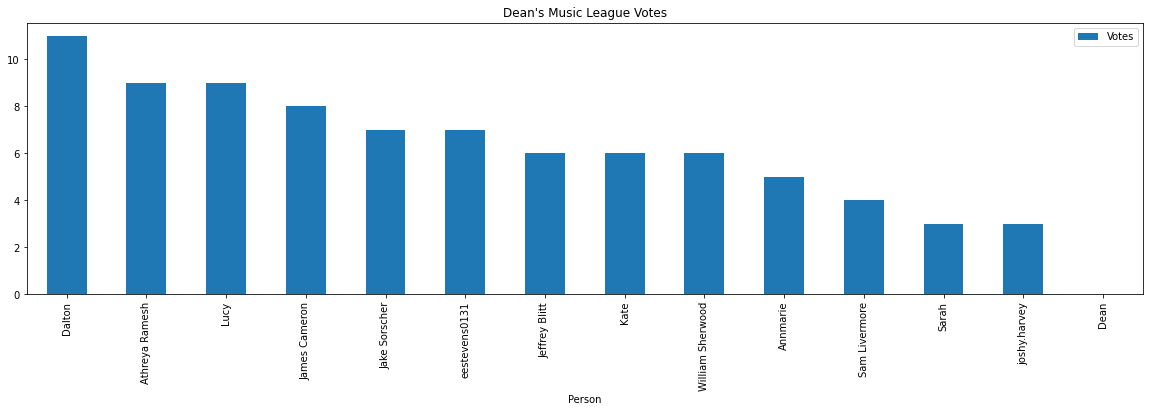

In [20]:
#Import necessary libraries (and have them installed too)
import pandas as pd
import matplotlib.pyplot as mpl
import seaborn as sbrn
import zipfile

#Adjust figure size so graph produced is readable
mpl.rcParams["figure.figsize"] = (20,5)

#Unzip new Music League data
with zipfile.ZipFile('export.zip', 'r') as zip_ref:
    zip_ref.extractall()

#Import CSV files
competitors = pd.read_csv('competitors.csv')
rounds = pd.read_csv('rounds.csv')
submissions = pd.read_csv('submissions.csv')
votes = pd.read_csv('votes.csv')

#Change column names to be more code-friendly
competitors.columns = competitors.columns.str.replace(' ','_')
rounds.columns = rounds.columns.str.replace(' ','_')
submissions.columns = submissions.columns.str.replace(' ','_')
votes.columns = votes.columns.str.replace(' ','_')

#Global Vars
pplArr = ["Jeffrey Blitt", "Dean", "Dalton", "Jake Sorscher", "eestevens0131", "Sam Livermore", "James Cameron", "Lucy", "Annmarie", "William Sherwood", "Sarah", "Kate", "Athreya Ramesh", "joshy.harvey"]
    #Array of competitor names for the "Rat King" music league, use to input into songsVotedFor
    
###LOOK HERE LOOK HERE###

PERSON_SELECTED = "Dean"
    #String, input one of the above into it to create their graph

#Function: songsVotedFor
#Returns: list
#Input: voterName (str, name of competitor), sourceDF (dataframe, created from votes.csv)
#Contract: Uses sourceDF to create a string of every song voted for by voterName

def songsVotedFor(voterName, sourceDF):
    #Create new dataframe withn only rows of voterName
    queryString = 'Voter_ID == "' + voterName + '"'
    newDF = sourceDF.query(queryString)
    songList = []
    #Add songs from this into array
    for index, row in newDF.iterrows():
        songList.append(row['Spotify_URI'])
    songList = list(set(songList))
    return songList

#Function: tallyVotes
#Returns: dataframe
#Input: songArr (array of Spotify URI strings), searchDF (dataframe, created from submissions.csv)
#Contract: Searches song submissions in searchDF, crossreferencing with songArr to count how many votes were given to which person

def tallyVotes(songArr, searchDF):
    #Create a counter that tracks votes for each person
    countArr = [0] * 14
    for songID in songArr:
        #Extracts songs matching entries in songArr from searchDF
        newDF = searchDF.query('Spotify_URI == "' + songID + '"')
        #If the submitter for a given song is in pplArr, increment their counter
        for index, name in enumerate(pplArr):
            if name == newDF.iloc[0]['Submitter_ID']:
                countArr[index] += 1
    #Aligns the peron's counters with their names
    voteDict = dict(zip(pplArr, countArr))
    return pd.DataFrame(voteDict.items(), columns=['Person', 'Votes'])


#----------------------------------------------------------------------------------------------------------------

#Create a new dataframe that contains a mapping of internal Round IDs to Round Names
roundsByID = rounds[["ID", "Name"]]

#Replace internal ids with names in the 'submissions' dataset
for index, row in competitors.iterrows():
    submissions.replace(to_replace = row['ID'], value = row['Name'], inplace=True)
for index, row in roundsByID.iterrows():
    submissions.replace(to_replace = row['ID'], value = row['Name'], inplace=True)

#Replace internal ids with names in the 'votes' dataset    
for index, row in roundsByID.iterrows():
    votes.replace(to_replace = row['ID'], value = row['Name'], inplace=True)
for index, row in competitors.iterrows():
    votes.replace(to_replace = row['ID'], value = row['Name'], inplace=True)
    
#Create the list of songs that PERSON_SELECTED voted for
songVotes = songsVotedFor(PERSON_SELECTED, votes)

#Create the dataframe of tallied votes
voteDF = tallyVotes(songVotes, submissions)

#Create graph from this dataframe
voteDF.groupby(['Person']).median().sort_values("Votes", ascending=False).plot.bar(title=PERSON_SELECTED + "'s Music League Votes")